## Final Project Submission

Please fill out:
* Student name: Alex Irungu
* Student pace: part time 
* Scheduled project review date/time: 3 June 2024
* Instructor name: Samuel Karu
* Blog post URL:


## DSC Phase 1 Project

### Importing LIbraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

### Connecting to SQL tables


In [2]:
# conncet to the database
conn = sqlite3.connect('/home/alex/Documents/Flatiron/course/phase_1/project_1/data/im.db')

# create a cursor
cur = conn.cursor()

#list all tables
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())

#get all records from movie_basics
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
print("Columns in movie_basics:")
print(movie_basics.columns)
# print(movie_basics)

#get all records from movie_ratings
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
print("\nColumns in movie_ratings:")
print(movie_ratings.columns)
# print(movie_ratings)




[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]
Columns in movie_basics:
Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

Columns in movie_ratings:
Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')


### Loading Datasets


In [3]:
import os
import pandas as pd

# Specify the directory you want to use
data_dir = 'data/'

# Get a list of all the CSV and TSV files in that directory
data_files = [f for f in os.listdir(data_dir) if f.endswith('.csv') or f.endswith('.tsv')]

# Create a dictionary of dataframes
dataframes = {}

for filename in data_files:
    # The key is the filename without the extension
    key = filename.rsplit('.', 1)[0]
    
    # Determine the correct delimiter
    if filename.endswith('.csv'):
        delimiter = ','
    elif filename.endswith('.tsv'):
        delimiter = '\t'
    
    try:
        dataframes[key] = pd.read_csv(data_dir + filename, delimiter=delimiter)
    except UnicodeDecodeError:
        dataframes[key] = pd.read_csv(data_dir + filename, delimiter=delimiter, encoding='ISO-8859-1')

# Now you can access each dataframe in the dictionary
# For example, to print the first few rows of each dataframe:
for key, df in dataframes.items():
    print(f"First few rows of {key}:")
    print(df.head())
    print("\n")

First few rows of bom.movie_gross:
                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  


First few rows of rt.reviews:
   id                                             review rating   fresh  \
0   3  A distinctly gallows take on contemporary fina...    3/5   fresh   
1   3  It's an allegory in search of a meaning that n...    NaN  rotten   
2   3  ... life lived in a bubble in financial dealin...    NaN   fresh   
3   3  Continuing along a line introduced in last 

### Merging DataSets


In [4]:
# Merge the dataframes on the common key (assuming it's 'tconst')
merged_df = pd.merge(movie_basics, movie_ratings, on='movie_id')

# Print the first few rows of the merged dataframe
print(merged_df.head())

    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  averagerating  numvotes  
0        2013            175.0    Action,Crime,Drama            7.0        77  
1        2019            114.0       Biography,Drama            7.2        43  
2        2018            122.0                 Drama            6.9      4517  
3        2018              NaN          Comedy,Drama            6.1        13  
4        2017             80.0  Comedy,Drama,Fantasy            6.5       119  


### Displaying initial rows of each column

In [5]:
# Print all keys in the dataframes dictionary
print(dataframes.keys())

dict_keys(['bom.movie_gross', 'rt.reviews', 'rt.movie_info', 'tmdb.movies', 'tn.movie_budgets'])


In [26]:
# Print the first few rows of each dataframe
# Print the first few rows of the 'bom.movie_gross' dataframe
print("First few rows of bom.movie_gross:")
print(dataframes['bom.movie_gross'].head())
print("\n")

# Print the first few rows of the 'rt.reviews' dataframe
print("First few rows of rt.reviews:")
print(dataframes['rt.reviews'].head())
print("\n")

# Print the first few rows of the 'rt.movie_info' dataframe
print("First few rows of rt.movie_info:")
print(dataframes['rt.movie_info'].head())
print("\n")

# Print the first few rows of the 'tmdb.movies' dataframe
print("First few rows of tmdb.movies:")
print(dataframes['tmdb.movies'].head())
print("\n")

# Print the first few rows of the 'tn.movie_budgets' dataframe
print("First few rows of tn.movie_budgets:")
print(dataframes['tn.movie_budgets'].head())
print("\n")


First few rows of bom.movie_gross:
                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  


First few rows of rt.reviews:
   id                                             review rating   fresh  \
0   3  A distinctly gallows take on contemporary fina...    3/5   fresh   
1   3  It's an allegory in search of a meaning that n...    NaN  rotten   
2   3  ... life lived in a bubble in financial dealin...    NaN   fresh   
3   3  Continuing along a line introduced in last 

### Cleaning TN Movie Budgets

In [28]:
# Get the 'tn.movie_budgets' dataframe
df = dataframes['tn.movie_budgets']

# Remove duplicates
df = df.drop_duplicates()

# Handle missing values - this will depend on your specific dataset
# Here, we'll drop rows with any missing values
df = df.dropna()

# Print all column names of the 'tn.movie_budgets' dataframe
print(dataframes['tn.movie_budgets'].columns)


Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')


In [29]:
# Convert data types - this will also depend on your specific dataset
# Here, we'll convert the 'production_budget', 'domestic_gross', and 'worldwide_gross' columns to int
df['production_budget'] = df['production_budget'].str.replace(',', '').str.replace('$', '').astype(int)
df['domestic_gross'] = df['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(int)
df['worldwide_gross'] = df['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(int)

# Rename columns - this is optional and depends on your preference
df = df.rename(columns={'movie': 'Movie Title', 'production_budget': 'Production Budget', 'domestic_gross': 'Domestic Gross', 'worldwide_gross': 'Worldwide Gross'})

# Store the cleaned dataframe back in the dictionary
dataframes['tn.movie_budgets'] = df

In [30]:
# Print the first few rows of the cleaned 'tn.movie_budgets' dataframe
print(dataframes['tn.movie_budgets'].head())

   id  release_date                                  Movie Title  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

   Production Budget  Domestic Gross  Worldwide Gross  
0          425000000       760507625       2776345279  
1          410600000       241063875       1045663875  
2          350000000        42762350        149762350  
3          330600000       459005868       1403013963  
4          317000000       620181382       1316721747  


### Cleaning TMDB Movies

In [32]:
# Get the 'tmdb.movies' dataframe
df = dataframes['tmdb.movies']

# Remove duplicates
df = df.drop_duplicates()

# Handle missing values - this will depend on your specific dataset
# Here, we'll drop rows with any missing values
df = df.dropna()

# Convert data types - this will also depend on your specific dataset
# Here, we'll convert the 'popularity' column to float
df['popularity'] = df['popularity'].astype(float)

# Rename columns - this is optional and depends on your preference
df = df.rename(columns={'original_title': 'Original Title', 'popularity': 'Popularity'})

# Store the cleaned dataframe back in the dictionary
dataframes['tmdb.movies'] = df

In [33]:
# Print the first few rows of the cleaned 'tmdb.movies' dataframe
print(dataframes['tmdb.movies'].head())

   Unnamed: 0            genre_ids     id original_language  \
0           0      [12, 14, 10751]  12444                en   
1           1  [14, 12, 16, 10751]  10191                en   
2           2        [12, 28, 878]  10138                en   
3           3      [16, 35, 10751]    862                en   
4           4        [28, 878, 12]  27205                en   

                                 Original Title  Popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   
2                                    Iron Man 2      28.515   2010-05-07   
3                                     Toy Story      28.005   1995-11-22   
4                                     Inception      27.920   2010-07-16   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1           

### Merge Datasets

In [35]:
# Print all column names of the 'bom.movie_gross' and 'tn.movie_budgets' dataframes
print(dataframes['bom.movie_gross'].columns)
print(dataframes['tn.movie_budgets'].columns)

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')
Index(['id', 'release_date', 'Movie Title', 'Production Budget',
       'Domestic Gross', 'Worldwide Gross'],
      dtype='object')


In [37]:
# Merge the dataframes on 'title' and 'Movie Title'
merged_df = pd.merge(dataframes['bom.movie_gross'], dataframes['tn.movie_budgets'], left_on='title', right_on='Movie Title', how='left')

# Print the first few rows of the merged dataframe
print(merged_df.head())

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year    id  release_date          Movie Title  \
0     652000000  2010  47.0  Jun 18, 2010          Toy Story 3   
1     691300000  2010   NaN           NaN                  NaN   
2     664300000  2010   NaN           NaN                  NaN   
3     535700000  2010  38.0  Jul 16, 2010            Inception   
4     513900000  2010  27.0  May 21, 2010  Shrek Forever After   

   Production Budget  Domestic Gross  Worldwide Gross  
0        200000000.0     415004880.0     1.068880e+09  
1                NaN             NaN              Na

### Genre Analysis

In [41]:
# Flatten the 'genre_id' lists and count the occurrences of each genre ID
genre_id_counts = pd.Series([genre_ids for sublist in dataframes['tmdb.movies']['genre_ids'] for genre_ids in sublist]).value_counts()

# Print the top 10 genre IDs
print(genre_id_counts.head(10))


[    26517
]    26517
,    21317
     21317
1    20460
8    17191
9    13488
7    12034
5    11754
3    10686
dtype: int64


### Average rating by genre

In [42]:
# Create a new dataframe where each row corresponds to a genre ID of a movie
df_genre_ratings = dataframes['tmdb.movies'].explode('genre_ids')

# Calculate the average rating by genre
average_rating_by_genre = df_genre_ratings.groupby('genre_ids')['vote_average'].mean()

# Print the average rating by genre
print(average_rating_by_genre)

genre_ids
[10402, 10749, 18]                7.950000
[10402, 10749, 35, 18]            6.500000
[10402, 10749, 35]                6.500000
[10402, 10749]                    5.466667
[10402, 10751, 14, 10770, 35]     5.400000
                                   ...    
[99, 9648]                        5.700000
[99, 99, 99]                     10.000000
[99, 99]                          8.250000
[99]                              6.798351
[]                                6.059863
Name: vote_average, Length: 2477, dtype: float64


## Visualization


### Barplot of top 10 movie genres

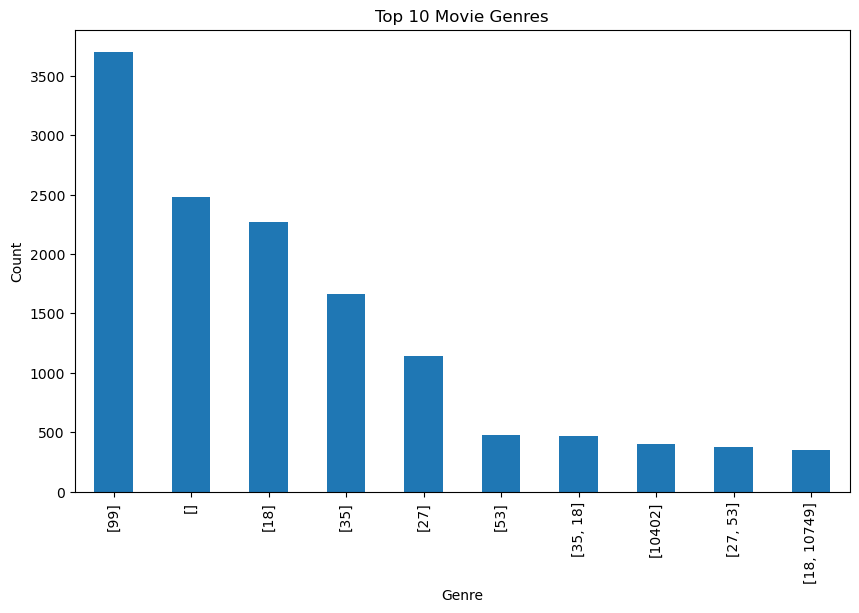

In [45]:
# Count the occurrences of each genre
genre_counts = dataframes['tmdb.movies']['genre_ids'].value_counts()

# Get the top 10 genres
top_10_genres = genre_counts.head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_10_genres.plot(kind='bar')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

### Barplot of Average rating by genre

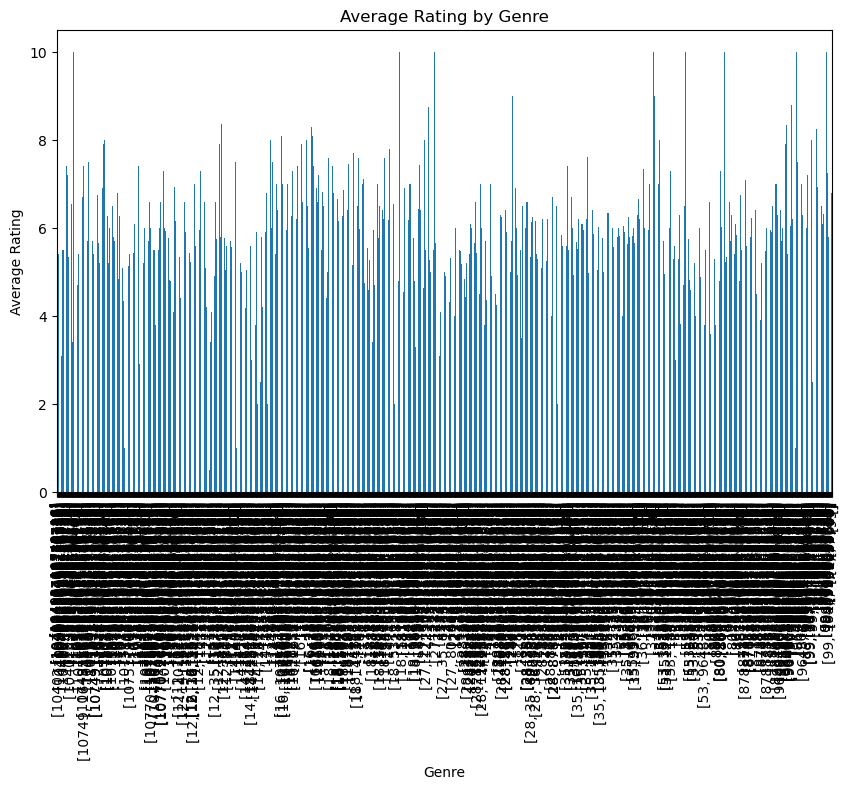

In [69]:
# Create a new dataframe where each row corresponds to a genre ID of a movie
df_genre_ratings = dataframes['tmdb.movies'].explode('genre_ids')

# Calculate the average rating by genre
average_rating_by_genre = df_genre_ratings.groupby('genre_ids')['vote_average'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
average_rating_by_genre.plot(kind='bar')
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()

### Scatter plot of production budget vs worldwide gross

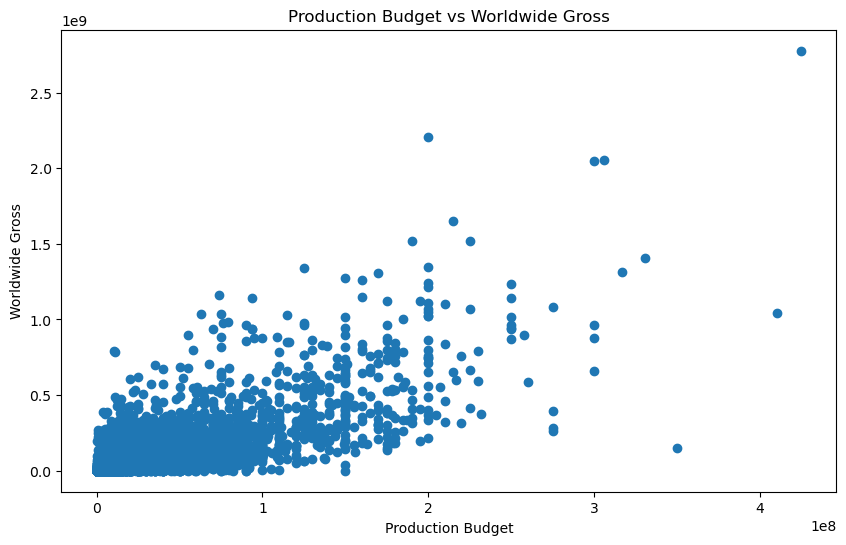

In [48]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(dataframes['tn.movie_budgets']['Production Budget'], dataframes['tn.movie_budgets']['Worldwide Gross'])
plt.title('Production Budget vs Worldwide Gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.show()

### Distribution of Production Budget of top 50 movies

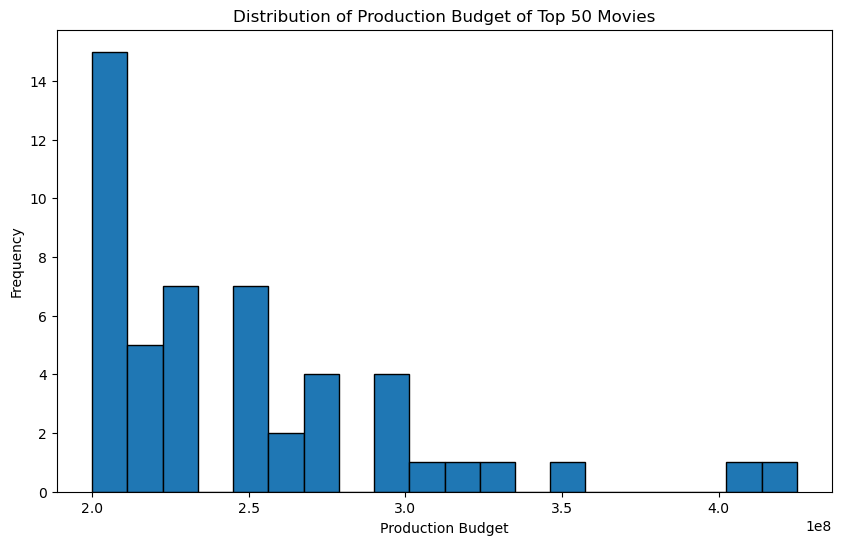

In [56]:
# Sort the dataframe by production budget in descending order and take the top 50 movies
top_50_movies = dataframes['tn.movie_budgets'].sort_values('Production Budget', ascending=False).head(50)

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(top_50_movies['Production Budget'], bins=20, edgecolor='black')
plt.title('Distribution of Production Budget of Top 50 Movies')
plt.xlabel('Production Budget')
plt.ylabel('Frequency')
plt.show()

### Histogram of Worlwide Gross and Domestic Gross Revenue

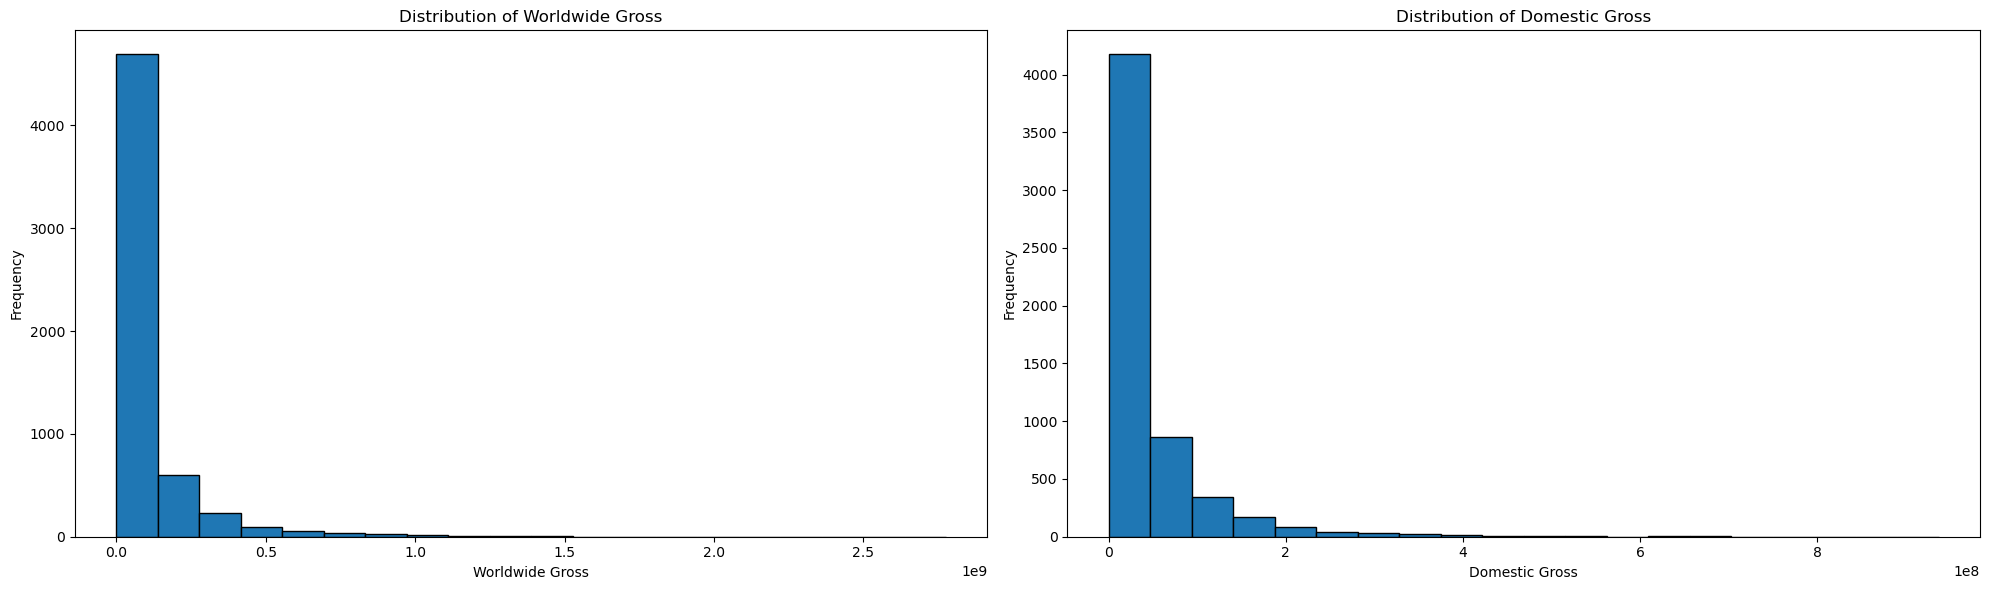

In [60]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Create a histogram for worldwide gross
axs[0].hist(dataframes['tn.movie_budgets']['Worldwide Gross'], bins=20, edgecolor='black')
axs[0].set_title('Distribution of Worldwide Gross')
axs[0].set_xlabel('Worldwide Gross')
axs[0].set_ylabel('Frequency')

# Create a histogram for domestic gross
axs[1].hist(dataframes['tn.movie_budgets']['Domestic Gross'], bins=20, edgecolor='black')
axs[1].set_title('Distribution of Domestic Gross')
axs[1].set_xlabel('Domestic Gross')
axs[1].set_ylabel('Frequency')

# Display the figure
plt.tight_layout()
plt.show()

### Release year vs number of movies released

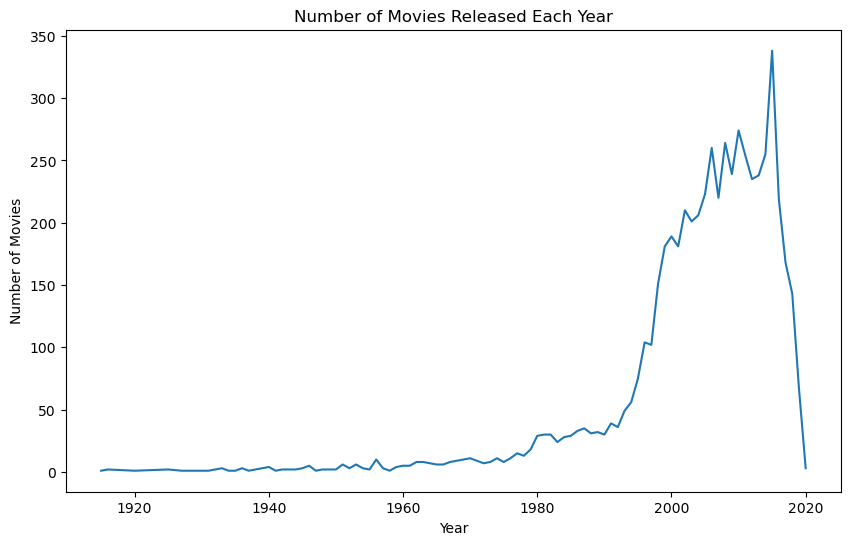

In [61]:

# Convert the 'release_date' column to datetime
dataframes['tn.movie_budgets']['release_date'] = pd.to_datetime(dataframes['tn.movie_budgets']['release_date'])

# Extract the year from the 'release_date' column
dataframes['tn.movie_budgets']['release_year'] = dataframes['tn.movie_budgets']['release_date'].dt.year

# Get the number of movies released each year
movies_per_year = dataframes['tn.movie_budgets']['release_year'].value_counts().sort_index()

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(movies_per_year.index, movies_per_year.values)
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

### Heatmap of Correlation Between Variables

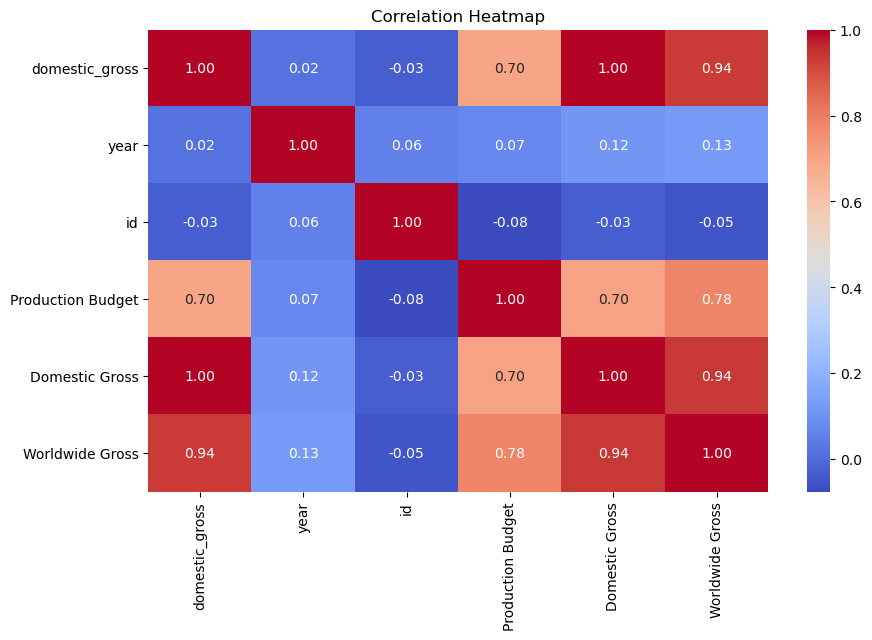

In [67]:
plt.figure(figsize=(10, 6))
sns.heatmap(merged_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### Business Recommendations

In [ ]:
"""
1. Focus on High-Performing Genres:
Identify genres that consistently perform well in terms of ratings and revenue. Invest more in producing movies in these genres to maximize returns.

2. Optimize Budget Allocations:
Use the insights from the budget vs. revenue analysis to allocate budgets more efficiently. Avoid over-investing in low-performing movies and ensure adequate investment in high-potential projects.

3. Leverage Audience Insights:
Tailor marketing and production strategies based on audience ratings and preferences. Focus on elements that resonate well with audiences to improve satisfaction and engagement.

4. Incorporate Feedback from Critical Reviews:
Pay attention to critical reviews and incorporate constructive feedback into future projects. This can help in enhancing the overall quality of movies and their reception.

5. Release Timing and Strategy:
Analyze the release dates and their impact on movie performance. Optimize release schedules to avoid high-competition periods and maximize visibility and revenue.
"""